# Overview

The following notebook supports a study of classifier methods used in contemporary machine learning. This specific experiment provides python implementations as a basis for comparisons of performance using the same dataset and evaluation criteria. This is by no means exhaustive, but illustrative in the differences between each method, and informative in which perform better on different types of data.

## Data

The data being used for this experiment is part of the sci-kit package, the MNIST images of handwritten digits. It is often used in machine learning as a validation set as it is a known quantity, comes cleansed, labeled, and packaged with sci-kit. It contains 60,000 training images and 10,000 test images.

In [1]:
#Data setup
from sklearn.datasets import fetch_mldata
mnist_dataset = fetch_mldata('MNIST original')

In [2]:
dir(mnist_dataset)

['COL_NAMES', 'DESCR', 'data', 'target']

In [3]:
X, y = mnist_dataset['data'], mnist_dataset['target']
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
#Let us examine the raw data of a single image
X[36000]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  86, 131, 225, 225, 225,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
random_digit = X[36000]
#Reshape to 28 x 28 for the 784 available features
random_digit_image = random_digit.reshape(28,28)
random_digit_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  86, 131, 225, 225, 225,   0,   0,
          0,   0],
       [  

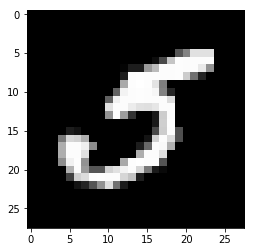

In [6]:
#Let's plot to see what the actual image looks like
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(random_digit_image, cmap='gray')

In [7]:
#Check the label
y[36000]

5.0

Now that the dataset is established, we now split into training and test sets. There are a variety of means of handling this including more advanced techniques like stratified sampling. For the sake of simplicity and abstraction we use the split capabilities of sklearn.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist_dataset.data, mnist_dataset.target, 
                                                    test_size=0.1, random_state=0)

In [9]:
X_train.shape

(63000, 784)

In [10]:
X_test.shape

(7000, 784)

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
logregress = LogisticRegression(solver = 'lbfgs')

In [12]:
#Train the model
logregress.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
#Now run predictions using the test set
logregress_predictions = logregress.predict(X_test)

In [16]:
#The mean accuracy on given test data and labels
#In multi-label classification, this is the  accuracy for each label's correct prediction
logregress_score = logregress.score(X_test, y_test)
print (logregress_score)

0.916


In [15]:
#Confirming that a multinomial model is being used
logregress.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [28]:
#Additional performance measures
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, logregress_predictions))

             precision    recall  f1-score   support

        0.0       0.96      0.97      0.96       660
        1.0       0.95      0.97      0.96       779
        2.0       0.91      0.90      0.91       688
        3.0       0.89      0.89      0.89       733
        4.0       0.92      0.92      0.92       640
        5.0       0.90      0.84      0.87       651
        6.0       0.95      0.98      0.96       738
        7.0       0.93      0.93      0.93       724
        8.0       0.86      0.86      0.86       672
        9.0       0.89      0.89      0.89       715

avg / total       0.92      0.92      0.92      7000



In [29]:
#Confusion matrix. Higher values along the diagonal are better
print("Confusion matrix:\n%s" % confusion_matrix(y_test, logregress_predictions))

Confusion matrix:
[[640   0   2   2   2   3   5   1   5   0]
 [  0 755   5   3   1   2   3   0   9   1]
 [  1   6 622  10   5   3   7  11  23   0]
 [  0   6  20 655   0  19   2   8  16   7]
 [  5   2   3   1 588   2   7   3   4  25]
 [  4   4   9  28   9 548  13   4  24   8]
 [  3   2   4   0   3   4 720   0   2   0]
 [  4   1  10   2   7   0   0 671   3  26]
 [  4  14  10  20   3  26   3   4 578  10]
 [  7   2   1  14  24   5   0  20   7 635]]


Mean accuracy: 91.6% <br>
Precision: 92% <br>
Recall: 92% <br>
F1-Score: 92% <br>
Labels with the most errors: "3", "8", "9" <br>

# Stochastic Gradient Descent

In [31]:
from sklearn.linear_model import SGDClassifier

In [88]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [89]:
sgd_predictions = sgd_clf.predict(X_test)

In [90]:
sgd_score = sgd_clf.score(X_test, y_test)
print(sgd_score)

0.889142857143


In [91]:
print(classification_report(y_test, sgd_predictions))

             precision    recall  f1-score   support

        0.0       0.91      0.97      0.94       660
        1.0       0.95      0.95      0.95       779
        2.0       0.89      0.90      0.89       688
        3.0       0.87      0.88      0.87       733
        4.0       0.92      0.89      0.90       640
        5.0       0.85      0.78      0.81       651
        6.0       0.97      0.92      0.94       738
        7.0       0.88      0.92      0.90       724
        8.0       0.78      0.85      0.81       672
        9.0       0.87      0.81      0.84       715

avg / total       0.89      0.89      0.89      7000



In [92]:
print("Confusion matrix:\n%s" % confusion_matrix(y_test, sgd_predictions))

Confusion matrix:
[[642   0   4   3   2   1   2   2   4   0]
 [  0 742   9   4   1   7   0   0  14   2]
 [  0   8 620  14   5   2   5  13  18   3]
 [  4   2  15 643   1  32   1  10  17   8]
 [  5   0   2   1 570   2   4   7  22  27]
 [ 13   5  10  24  12 509   8   7  57   6]
 [ 18   1  17   0   2  16 679   0   5   0]
 [  4   0   5   4  10   1   1 669   0  30]
 [  3  18  15  26   1  19   1  10 570   9]
 [ 13   1   1  23  17  13   0  43  24 580]]


Mean accuracy: 88.9% <br>
Precision: 89% <br>
Recall: 89% <br>
F1-Score: 89% <br>
Labels with the most errors: "5", "3", "8", "7" <br>

# Scalable Vector Machine

In [93]:
from sklearn.svm import LinearSVC

scalable_vec_machine = LinearSVC(C=1, loss="hinge")
scalable_vec_machine.fit(X_train, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [94]:
svm_predictions = scalable_vec_machine.predict(X_test)

In [95]:
svn_score = scalable_vec_machine.score(X_test, y_test)
print(svn_score)

0.866857142857


Adjusting hyperparameters to try coaxing better performance

In [99]:
scalable_vec_machinel2 = LinearSVC(C=4, loss="hinge")
scalable_vec_machinel2.fit(X_train, y_train)

LinearSVC(C=4, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [100]:
svm_predictions2 = scalable_vec_machinel2.predict(X_test)

In [101]:
svn_score2 = scalable_vec_machinel2.score(X_test, y_test)
print(svn_score2)

0.883285714286


In [43]:
scalable_vec_machinel3 = LinearSVC(C=0.5, loss="hinge")
scalable_vec_machinel3.fit(X_train, y_train)

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [44]:
svn_score3 = scalable_vec_machinel3.score(X_test, y_test)
print(svn_score3)

0.832142857143


Decrease in mean accuracy. Selecting the second model for performance measures and evaluation

In [102]:
print(classification_report(y_test, svm_predictions2))

             precision    recall  f1-score   support

        0.0       0.89      0.96      0.92       660
        1.0       0.94      0.96      0.95       779
        2.0       0.88      0.89      0.88       688
        3.0       0.84      0.87      0.85       733
        4.0       0.93      0.86      0.90       640
        5.0       0.86      0.76      0.81       651
        6.0       0.93      0.96      0.95       738
        7.0       0.93      0.92      0.92       724
        8.0       0.77      0.80      0.78       672
        9.0       0.87      0.83      0.85       715

avg / total       0.88      0.88      0.88      7000



In [103]:
print("Confusion matrix:\n%s" % confusion_matrix(y_test, svm_predictions2))

Confusion matrix:
[[636   0   4   3   2   2   5   1   7   0]
 [  0 751   3   7   1   3   1   0  13   0]
 [ 10   4 610   7   2   4   9  10  30   2]
 [  6   5  28 639   0  16   2   7  23   7]
 [ 11   2   7   3 552   6   7   2  18  32]
 [ 19   4  13  46   6 495  22   4  31  11]
 [ 14   2   7   0   0   4 706   0   5   0]
 [  5   1   7   3  10   1   0 668   3  26]
 [  5  28  12  34   1  35   3   6 535  13]
 [ 12   2   5  21  19   7   1  24  33 591]]


Mean accuracy: 88.3% <br>
Precision: 88% <br>
Recall: 88% <br>
F1-Score: 88% <br>
Labels with the most errors: "3", "8", "5" <br>

# Neural Network

In [50]:
import tensorflow as tf
sess = tf.InteractiveSession()

In [51]:
#setup and initialize weight and bias to 0 values
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [72]:
#setup and initialize feature vector - x_tf, yhat or true distribution y_, and y or predicted distribution - y_tf 
x_tf = tf.placeholder(tf.float32, [None, 784])
y_tf = tf.nn.softmax(tf.matmul(x_tf, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])

In [73]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_tf), reduction_indices=[1]))

In [74]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [75]:
#Execution
sess = tf.InteractiveSession()

In [76]:
tf.global_variables_initializer().run()

In [77]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [78]:
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x_tf: batch_xs, y_: batch_ys})

In [79]:
correct_prediction = tf.equal(tf.argmax(y_tf,1), tf.argmax(y_,1))

In [80]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [81]:
print(sess.run(accuracy, feed_dict={x_tf: mnist.test.images, y_: mnist.test.labels}))

0.9172
